<a href="https://colab.research.google.com/github/chsanabriam/Esatdistica_Aplicada/blob/master/Inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use("ggplot")

# Inferencia Estadística
Hasta ahora hemos visto como dado un modelo de probabilidad, podíamos calcular la probabilidad de que una variable tomara un cierto valor.

Ahora nos interesa el proceso inverso: una vez observada la frecuencia con la que la variable toma los valores, buscamos un modelo probabilístico que describa los datos. A esto se llama **inferencia estadística**.

La **inferencia estadística** trata básicamente con generalizaciones y predicciones. Por ejemplo, podemos afirmar, con base en opiniones de varias personas entrevistadas en Bogotá, que en las próximas elecciones municipales el 52% de los electores votará por el candidato A. En este caso tratamos con una muestra aleatoria de opiniones de una población finita muy grande.

En otro ejemplo, podemos afirmar que el costo promedio para construir una piscina está entre 4 y 4.5 millones de pesos, con base en las estimaciones de tres contratistas seleccionados al azar de 30 que construyen piscinas residenciales actualmente. La población que será muestreada aquí es finita pero muy pequeña.

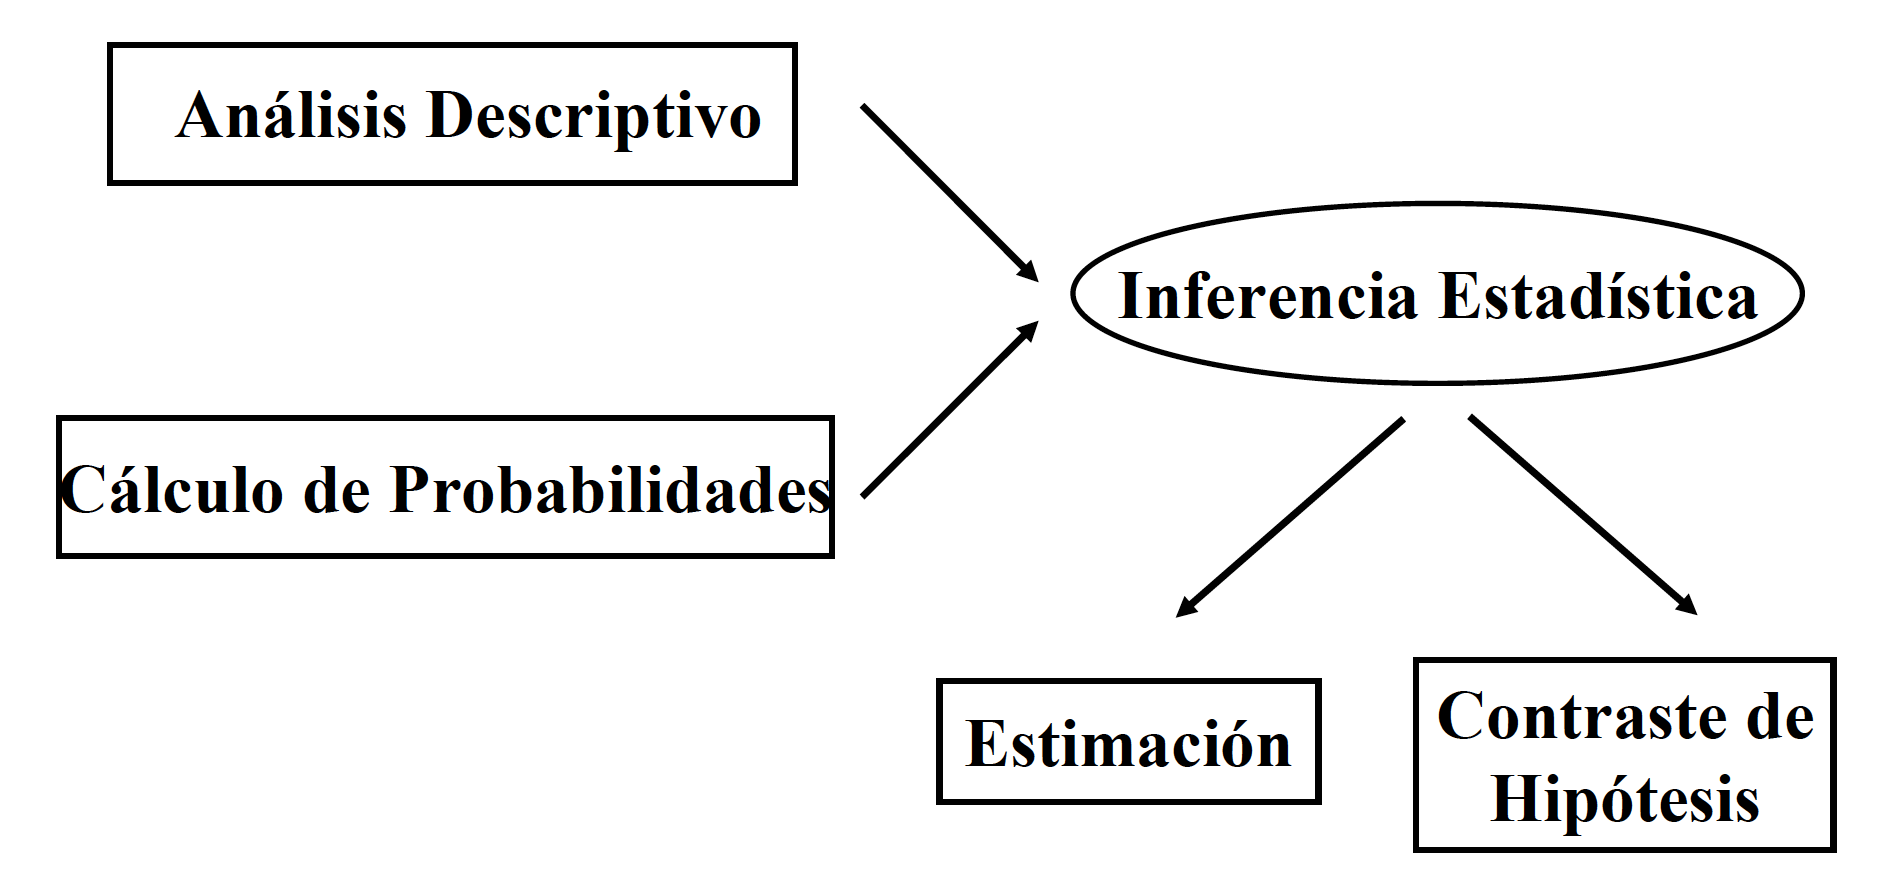

En cada uno de estos ejemplos calculamos una **estadística** a partir de una **muestra** seleccionada de la **población**, y de estas estadísticas hacemos varias afirmaciones con respecto a los valores de los parámetros de la población que pueden ser ciertos o no.

##Algunas definiciones
###Población
conjunto de referencia del que extraemos las observaciones, es decir, el conjunto de todas las posibles unidades experimentales. Por más que nos refiramos muchas veces a este concepto como población, este conjunto no tiene que ser necesariamente un grupo de personas o animales (pensemos en las variables cantidad de plomo en orina, procedimiento quirúrgico, visitas al
médico, tiempo hasta que muere una persona tras una operación).

###Muestra
subconjunto de elementos de la población que habitualmente utilizaremos para realizar un estudio estadístico. Se suelen tomar muestras cuando es difícil, imposible o costosa la observación de todos los elementos de la población estadística, es decir, su uso se debe a que frecuentemente la población es demasiado extensa para trabajar con
ella. El número de elementos que componen la muestra es a lo que
llamamos tamaño muestral y se suele representar por la letra minúscula $n$.

###Estadístico
Es una medida usada para describir alguna característica de una muestra (media, mediana, desviación típica,...) y un parámetro es una medida usada para describir las mismas características pero de la población
(media, mediana, desviación típica,...). Cuando el estadístico se calcula en
una muestra con idea de hacer inferencia sobre la misma característica en la población, se le llama estimador. La inferencia estadística pretende aproximarse a los parámetros de la población a partir de los estimadores de
la muestra.

* La **inferencia estadística** esta basada en el estudio de las muestras. 

* La muestra debe ser representativa de la población para extraer conclusiones validas sobre esta población. La muestra debe ser aleatoria.

###Muestreo Aleatorio
Es aquel procedimiento de selección de la muestra en el que todos y cada uno de los elementos de la población tiene una cierta probabilidad de
resultar elegidos. De esta forma, si tenemos una población de $N$ elementos y estamos interesados en obtener una muestra de $n$ elementos (muestra de tamaño $n$), cada subconjunto de $n$ elementos de la población tendrá también una cierta probabilidad de resultar la muestra elegida. 

####Muestreo Aleatorio Simple
Cada elemento de la población tiene la misma probabilidad de ser elegido para formar parte de la muestra y cada muestra del mismo tamaño tiene la misma probabilidad de ser seleccionada.

La técnica del muestreo puede
asimilarse a un modelo de extracción de bolas de una urna con devolución
(*reemplazamiento*) de la bola extraída. Un mismo dato puede, en consecuencia, resultar muestreado más de una vez. Cada elección no depende de las anteriores y, por tanto,
los datos muestrales serán **independientes**.

#### Ejemplo en poblaciones finitas
En un instituto se quiere realizar un estudio sobre el nivel de colesterol de los alumnos. Para ello, se decide
extraer una muestra aleatoria simple de tamaño 10.

* Población $\to$ alumnos del instituto.
* Variable aleatoria $X$ $\to$ nivel de colesterol.
* Muestra aleatoria simple de tamaño 10 $\to$ *variables aleatorias* $x_1, x_2, x_3, \ldots, x_{10}$, con $x_i$ el nivel de colesterol del i-ésimo alumno seleccionado.

Se seleccionan 10 alumnos y sus niveles de colesterol son:
129, 170, 135, 140, 225, 163, 131, 203, 187, 149.

Por lo tanto los valores observados de las variables aleatorias son:

$x_1 = 129$, $x_2=170$, $x_3=135$, $x_4=140$, $x_5=225$, $x_6=163$, $x_7=131$, $x_8=203$, $x_9=187$ y $x_{10}=149$.

#### Ejemplo en poblaciones infinitas
Se analizan muestras de agua de un río para estudiar el índice de diversidad de especies. Este índice se utiliza para medir el efecto de una perturbación, como la contaminación del agua, en seres vivos. Puede determinarse la diversidad de la población antes y después de la perturbación. Si el índice tras la perturbación es
mucho mas pequeño indica que la perturbación ha tenido efectos negativos. Para esto, se decide extraer una muestra aleatoria simple de tamaño 8.

* Población $\to$ posible análisis del agua.
* Variable aleatoria $X$ $\to$ índice de diversidad.
* Muestra aleatoria simple de tamaño 8 $\to$ *variables aleatorias* $x_1, x_2, x_3, \ldots, x_8$, con $x_i$ el índice de diversidad del i-ésimo análisis realizado.

Se realizan 8 análisis y sus índices de diversidad son: 1.92; 1.87; 1.35; 1.48; 2.13; 1.85; 2.07; 1.98.

Por lo tanto los valores observados de las variables aleatorias son:

$x_1 = 1.92$, $x_2=1.87$, $x_3=1.35$, $x_4=1.48$, $x_5=2.13$, $x_6=1.85$, $x_7=2.07$ y $x_8=1.98$.



###Distribución muestral
Por tanto, cada dato muestral será una variable aleatoria que
tendrá asociada una función de probabilidad $f(x)$ según una
determinada distribución que llamaremos distribución de la población y recorrerá todos los posibles valores de la población.
Si trabajamos con un muestreo aleatorio simple (M.A.S.), cada dato muestral será independiente de los demás y por tanto la función de
probabilidad conjunta de la muestra será:
$$f(x) = f ( x_1 ,x_2 ,x_3 ,x_4, \ldots ,x_n ) =f(x_1)\cdot f(x_2)\cdot f(x3 )\cdots f(x_n)$$

por ser las $x_j$ variables aleatorias independientes.



##Estadístico
*“Una función de los valores de la
muestra”*. Es una variable aleatoria, cuyos valores dependen de la muestra seleccionada. Su distribución de
probabilidad, se conoce como *“Distribución muestral del
estadístico”*.

Sea una población donde se observa la variable aleatoria $X$. Esta variable $X$, tendrá una distribución de probabilidad, que puede ser conocida o desconocida, y ciertas características o parámetros poblacionales.

Sea una población donde se observa la variable aleatoria $X$. La esperanza y la varianza son:
$$E(X) = \mu \quad \text{y} \quad Var(X) = \sigma^2$$

Consideramos una muestra aleatoria simple, m.a.s., de tamaño $n$, formada por las v.a. $x_1, x_2,\ldots,x_n$.

Definimos los siguientes estadísticos muestrales:
* Media muestral
$$\bar{x} = \frac{x_1+x_2+\ldots+x_n}{n}$$
* Varianza muestral
$$\sigma^2 = \frac{\sum_{i=1}^{n}\left(x_i - \bar{x}\right)^2}{n}$$
* Cuasi-Varianza muestral
$$S^2 = \frac{\sum_{i=1}^{n}\left(x_i - \bar{x}\right)^2}{n-1}$$

Consideramos todas las posibles muestras de tamaño n


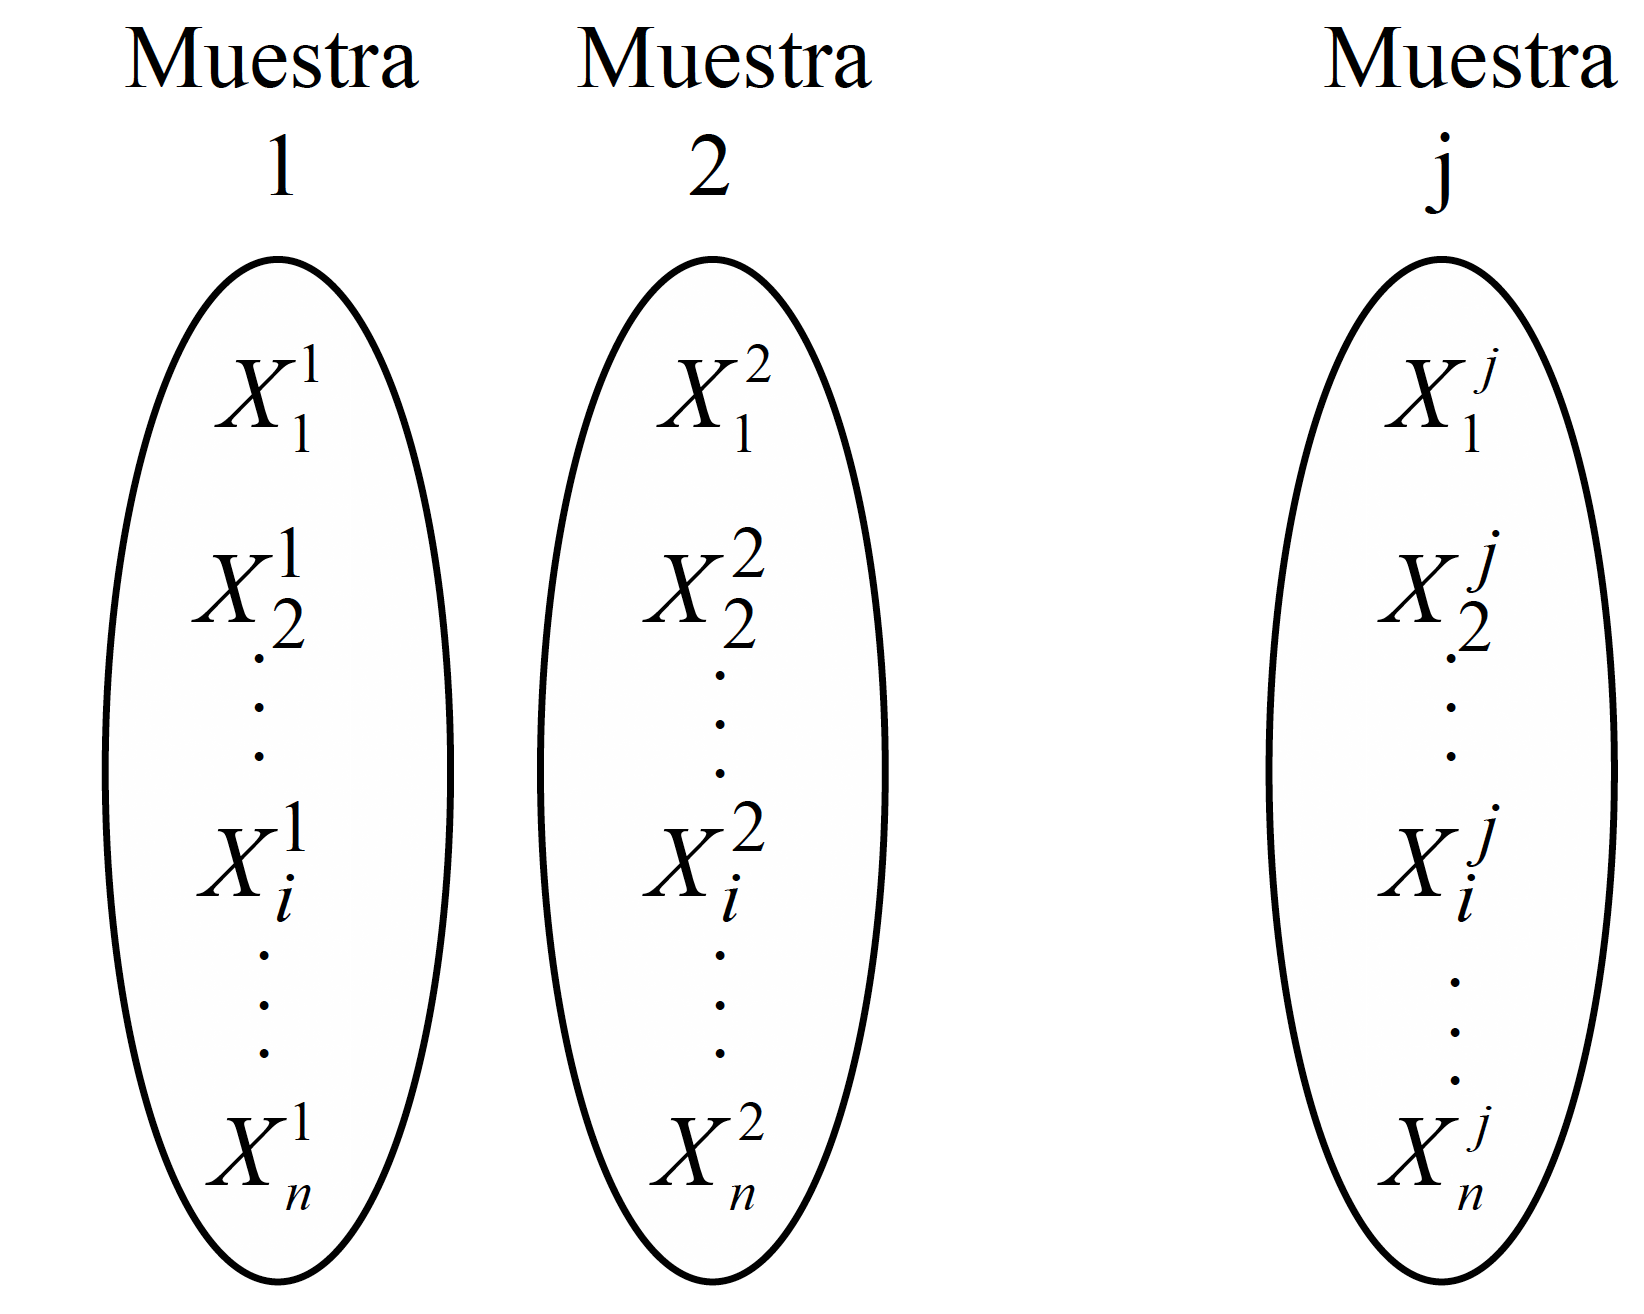

La variable aleatoria $\bar{X}$ toma los valores: $x_1, x_2 ,\ldots, x_j$ y su distribución de probabilidad es conocida como "*Distribución de la media muestral*" y tiene valores de esperanza y varianza son:
$$E(\bar{X}) = \mu_{\bar{x}} \quad \text{y} \quad Var(X) = \sigma^2_{\bar{x}}$$ 

Los estadísticos muestrales, media, varianza y cuasi-varianza verifican las siguientes propiedades.
* Media muestral
$$E(\bar{X}) = \mu_{\bar{x}} = \mu$$
$$Var(\bar{X}) = \sigma^2_{\bar{x}} = \frac{\sigma^2}{n}$$
* Varianza muestral
$$E(X) = \frac{n-1}{n}\sigma^2$$
* Cuasi-varianza muestral
$$E(S^2) = \sigma^2$$

**Estas propiedades se verifican siempre, cualquiera que sea la distribución de la variable X**

####Ejemplo en poblaciones infinitas
Sea una v.a. $X$ con valores: $1, 3, 5$. Consideramos una m.a.s. de tamaño 2. Obtener:

1. Media y varianza de la v.a $X$
2. Media y varianza de la v.a $\bar{X}$



1. En el caso de $X$ la distribución es uniforme.

| x |P(x) |
|---|-----|
|1  | 1/3 |
|3  | 1/3 |
|5  | 1/3 |

$$\mu = E(X) = \sum_{i=1}^{3} x_if(x_i) = 3$$
$$\sigma^2 = \sum_{i=1}^{3}(x_i - \mu)^2f(x_i) = \frac{8}{3}$$

2. En este caso debemos encontrar todas las posibles combinaciones de muestras de tamaño 2 con los valores 1,3 y 5. Luego sacar el promedio para cada par de números.

In [ ]:
# Calcule la tabla de posibles combinaciones de (x1,x2), es decir todas 
# las posibles muestras de tamaño 2 con los números 1,3 y 5
valores = [[1,3,5]]*2
muestras = np.array(list(itertools.product(*listas)))

In [ ]:
muestras

array([[1, 1],
       [1, 3],
       [1, 5],
       [3, 1],
       [3, 3],
       [3, 5],
       [5, 1],
       [5, 3],
       [5, 5]])

In [ ]:
#Para cada muestra guarde el valor promedio en el vector xprom
xprom = muestras.mean(axis=1)

In [ ]:
# Para cada valor de xprom calcule su probabilidad y guardelo en el vector
# prob
np.unique(xprom, return_counts=True)

(array([1., 2., 3., 4., 5.]), array([1, 2, 3, 2, 1]))

In [ ]:
#Ahora con estos vectores encuentre el valor de la media muestral
# y la varianza muestral
 

##Métodos de la inferencia
Dado un fenómeno aleatorio sobre el cual queremos estudiar ciertos aspectos, construimos una v.a. $X$ y una m.a.s. $x_1, x_2, \ldots, x_n$. Nos propondremos por lo general determinar la naturaleza aleatoria del fenómeno y por tanto, inferir cuál es la ley de probabilidades que modela a la v.a. $X$. Se dan varios
casos:

(a) Cuando no sabemos nada sobre la función de distribución $f(x)$.

(b) Cuando se sabe que $f(X)$ pertenece a cierta familia o clase de distribuciones pero se desconoce un parámetro, que en adelante denotaremos por $\theta$, del cual depende la distribución de probabilidad. Por ejemplo, se sabe que
$X \approx B(1, \theta)$ pero $\theta$ no se conoce, sólo se sabe que $\theta \in \Theta$ (a $\Theta$ se le llama espacio paramétrico). Nuestro objetivo es determinar de alguna manera este parámetro $\theta$.

El tipo de inferencia estadística que practicaremos recibe el nombre de Inferencia Paramétrica (estimación de parámetros). Los métodos que proponemos para obtener información sobre $\theta$ son los siguientes:

(i) **Estimación puntual:** consiste en obtener un valor numérico que aproxime al valor real del parámetro $\theta$. Los más interesantes son el método de los momentos y el de la máxima verosimilitud.

(ii) **Estimación por intervalo (intervalos de confianza):** consiste en la construcción de un intervalo $I= [θ_1^*, θ_2^*]$ de forma que la probabilidad de que $\theta$ pertenezca a $I$ sea grande y a su vez la longitud de dicho intervalo sea
pequeña.

(iii) **Contrastación de Hipótesis:** consiste en emitir una conjetura sobre $\theta$ para más tarde, y en base a una serie de reglas y una muestra, dilucidar si tal conjetura es o no aceptable.


###Ejemplo
Una planta industrial envasa detergente en polvo en paquetes que se etiquetan con: CONTENIDO 4 Kg.

El proceso viene siguiendo un patrón normal y se considera bajo control mientras cumpla: $\mu=4.01$ Kg. y $\sigma=0.005$ Kg.

Pero el proceso se puede desajustar (aumento o disminución de $\mu$ o $\sigma$, aparición de asimetría, etc.) e interesa poder chequear en cualquier momento el estado del proceso de envasado.

La Estadística Inferencial aporta herramientas para dar respuesta a preguntas naturales como éstas:
1. ¿Cuánto valen $\mu$ y $\sigma$ (ESTIMACIÓN PUNTUAL)
2. ¿Entre qué valores se encuentran $\mu$ y $\sigma$ con ciertas garantías de acierto (95% ó 99%)?
(ESTIMACIÓN por INTERVALOS DE CONFIANZA)

##Estimadores
Son estadísticos independientes de los parámetros de la población, y que se utilizan para aproximarlos. Si $\theta$ es el parámetro de interés, el estimador se denotará por $\hat{\theta}$. En el caso de una población
Normal, podemos considerar la media muestral como estimador de la media poblacional (es decir, $\bar{X} = \hat{\mu})$ y la varianza muestral como estimador de la varianza poblacional ($s^2 = \hat{\sigma}^2$).
 
Para una distribución $Bi(m, p)$,
donde m denota el número de pruebas de Bernoulli, la proporción $p$ se puede estimar a partir de la
proporción poblacional (que denotaremos por $\hat{p}$). Por tanto, $\bar{X}$, $s^2$ y $\hat{p}$ son estimadores puntuales de $\mu$, $\sigma^2$ (en distribución Normal) y $p$ (en distribución Binomial), respectivamente.
###Propiedades de los estimadores
####Estimadores insesgados
Un estimador debe estar *“próximo”* en algún sentido al valor verdadero del parámetro desconocido. De manera formal, se dice que $\hat{\theta}$ es un estimador insesgado de $\theta$ si el valor esperado de $\hat{\theta}$ es igual a $\theta$ . Esto equivale a afirmar que la media de la distribución de probabilidad de $\hat{\theta}$ (o la media de la distribución de muestreo de $\hat{\theta}$) es igual a $\theta$.

Un estimador $\hat{\theta}$ es un **estimador insesgado** para estimar a $\theta$ si
$$E(\hat{\theta}) = \theta$$
Si el estimador no es insesgado, entonces la diferencia
$$E(\hat{\theta}) - \theta$$
es conocido como **sesgo** del estimador $\hat{\theta}$.

###Métodos de construcción de estimadores
Veamos los dos métodos generales, de amplio espectro, de construcción de estimadores: método de momentos y método de máxima verosimilitud.

####Método de momentos
La idea de este método es natural, y se basa en que, dada una muestra ($x_1,\ldots,x_n$) de la variable $X$ que sigue una distribución dada por $f(x; \theta)$, 
* La media muestral $x$ “debe parecerse” a la media poblacional $E_{\theta}(X)$ (la esperanza de $X$ si se diera el parámetro $\theta$). 
* La media poblacional $E_{\theta}(X)$ es de hecho una función de $\theta$. 

“Por consiguiente”: 
* planteamos la ecuación (con incógnita $\theta$)
$$E_{\theta}(X) = x,$$
* despejamos $\theta$ de la ecuación,
* ésta es la estimación por momentos de $\theta$, a la que nombramos como $\hat{\theta}$.

####Ejemplo
Digamos que tenemos la
siguiente muestra de tamaño 8 de una $X \sim Ber(p)$:
$$\{0,1,1,0,1,1,1,0\}$$
* Muestre que la media muestral es 5/8

In [ ]:
#Escriba su código aquí


Por otro lado dado que $E_{\theta}=p$. De manera que planteamos la ecuación
$$p=\frac{5}{8}$$
cuya solución es $\hat{p} = 5/8$. Esta sería la estimación de $p$ por momentos para la muestra dada.

####Ejercicio
Genere 10 muestras de tamaño 8 y para cada una de ellas calcule el valor de $p$. A partir de lo anterior responda la siguiente pregunta: ¿La estimación obtenida de $p$ depende de la muestra?

In [ ]:
#Escriba su código aquí


####Ejemplo 
Por ejemplo, tenemos una muestra de una v.a. geométrica: $3,0,2,0,1,5,2,5,15,1$. El valor promedio de la muestra es: 

In [ ]:
#Escriba aquí su código


Ahora la estimación de $p$ por el método de los momentos es:
$E(X) = \frac{1}{n}\sum_{i=1}^{n}x_i$

In [ ]:
#Escriba su código aquí para encontrar p


Los momentos están relacionados con los parámetros de la distribución
asociada.

Dada una muestra aleatoria $x_1, x_2, x_3, \ldots, x_n$, el momento muestral de orden $k$ es:
$$\frac{1}{n}\sum_{i=1}^{n}x_i^k$$

Sea $x_1, x_2, x_3, \ldots, x_n$ una m.a. de una distribución con función de probabilidad puntual o función de densidad que depende de m parámetros $\theta_1, \theta_2, \theta_3, \ldots, \theta_n$ . Los estimadores de momentos de $\theta_1, \theta_2, \theta_3, \ldots, \theta_n$ son los valores $\hat{\theta}_1, \hat{\theta}_2, \hat{\theta}_3, \ldots, \hat{\theta}_n$ que se obtienen
igualando $m$ momentos poblacionales con los correspondientes momentos muestrales. En general, se obtienen resolviendo el siguiente sistema de ecuaciones

$$\frac{1}{n}\sum_{i=1}^{n}x_i^k = E(X^k)\quad k=1,2,\ldots ,m$$

####Ejemplo
Sea $x_1, x_2, x_3, \ldots, x_n$ una m.a. de una distribución $\Gamma (\alpha, \lambda)$. Como hay dos parámetros a estimar, planteamos un sistema de ecuaciones basadas en el primer y en el segundo momento.

Dado que $X \sim \Gamma (\alpha, \lambda)$, entonces $E(X) = \frac{\alpha}{\lambda}$ y $V(X) = \frac{\alpha}{\lambda^2}$ y la relación $V(X) = E(X^2) - (E(X))^2$

$$
\left \{ \begin{matrix} \frac{1}{n} \sum_{i=1}^{n}x_i = E(X), & \mbox{entonces } \frac{1}{n} \sum_{i=1}^{n}x_i = \frac{\alpha}{\lambda}\\
\frac{1}{n} \sum_{i=1}^{n}x_i^2 = E(X^2), & \mbox{entonces } \frac{1}{n} \sum_{i=1}^{n}x_i^2 = {\alpha}{\lambda^2} + \left(\frac{\alpha}{\lambda} \right)^2
\end{matrix}\right.
$$

Reemplazando $\frac{\alpha}{\lambda} = \bar{X}$, en la segunda ecuación
$$\frac{1}{n}\sum_{i=1}^n x_i^2 = \frac{\bar{X}}{\lambda} + \bar{X}^2$$
Despejando $\lambda$
$$\hat{\lambda} = \frac{\bar{X}}{\frac{\sum_{i=1}^{n}x_i^2}{n}-\bar{X}^2}$$
Y reemplazando el estimador de $\lambda$ en la primera ecuación obtenemos el estimador de $\alpha$
$$\hat{\alpha} = \frac{\bar{X}^2}{\frac{\sum_{i=1}^{n}x_i^2}{n} - \bar{X}^2}$$

####Ejercicio
Sea $X_1,X_2,\ldots,X_{50}$ una muestra aleatoria de una distribución exponencial de parámetro $b$ desconocido. A partir de la muestra estimar el parámetro $b$.


In [ ]:
X = [2.51005034, 2.60382829, 2.69760625, 2.7913842 , 2.88516216,
       2.97894012, 3.07271807, 3.16649603, 3.26027398, 3.35405194,
       3.4478299 , 3.54160785, 3.63538581, 3.72916377, 3.82294172,
       3.91671968, 4.01049763, 4.10427559, 4.19805355, 4.2918315 ,
       4.38560946, 4.47938741, 4.57316537, 4.66694333, 4.76072128,
       4.85449924, 4.9482772 , 5.04205515, 5.13583311, 5.22961106,
       5.32338902, 5.41716698, 5.51094493, 5.60472289, 5.69850084,
       5.7922788 , 5.88605676, 5.97983471, 6.07361267, 6.16739062,
       6.26116858, 6.35494654, 6.44872449, 6.54250245, 6.63628041,
       6.73005836, 6.82383632, 6.91761427, 7.01139223, 7.10517019]
#Escriba su código aquí


####Ejercicio
Sea $X_1,X_2,\ldots,X_{50}$ una muestra aleatoria de una distribución uniforme de parámetros $a,b$ desconocidos. A partir de la muestra estimar los parámetro $a,b$.

In [ ]:
X = [1.025, 1.075, 1.125, 1.175, 1.225, 1.275, 1.325, 1.375, 1.425,
       1.475, 1.525, 1.575, 1.625, 1.675, 1.725, 1.775, 1.825, 1.875,
       1.925, 1.975, 2.025, 2.075, 2.125, 2.175, 2.225, 2.275, 2.325,
       2.375, 2.425, 2.475, 2.525, 2.575, 2.625, 2.675, 2.725, 2.775,
       2.825, 2.875, 2.925, 2.975, 3.025, 3.075, 3.125, 3.175, 3.225,
       3.275, 3.325, 3.375, 3.425, 3.475]
#Escriba su código aquí


####Método de máxima verosimilitud
Este método fue introducido por Fisher en la década de 1920. Se basa en la idea de, dada una muestra, hallar los valores de los parámetros
que hacen que la probabilidad de obtener dicha muestra sea máxima.

####Ejemplo
Se realiza una encuesta de opinión a una m.a. de 20 personas. Se les formula una única pregunta que será respondida por Si o por NO. Sean $x_1, x_2, \ldots,x_{20}$ las v.a.
correspondientes a la respuesta, tales que
$$x_i = \left\{
  \begin{matrix}
  1 & \mbox{si la persona $i$ responde SI}\\
  0 & \mbox{si la persona $i$ responde NO}
  \end{matrix}
  \right.$$
para $i = 1,2,\ldots,20$ y sea $p=P(X_i=1)$.

Observemos que las v.a. $X_i$ son independientes y cada una de ellas tiene distribución $Bi(1,p)$. Entonces, la función de probabilidad conjunta del vector $(x_1,x_2, \ldots, x_{20})$ es
$$p(x_1,x_2,\ldots,x_{20}) = p^{x_1}(1-p)^{1-x_1}p^{x_2}(1-p)^{1-x_2}\ldots p^{x_{20}}(1-p)^{1-x_{20}}$$
Si en la muestra obtenida se observan 7 NO’s (0) y 13 SI’s (1), sería
$$p(x_1,x_2,\ldots,x_{20}) = p^{13}(1-p)^{7}$$
La pregunta es: ¿qué valor de $p$ hace que los valores muestrales obtenidos sean los más probables?

Es decir, buscamos el valor de p que hace máxima $p(x_1,x_2,\ldots,x_{20})$ o equivalentemente $\ln p(x_1,x_2,\ldots,x_{20})$ ya que ln es una función monótona creciente. Debemos maximizar la siguiente función de $p$
$$g(p) = \ln p(x_1,x_2,\ldots,x_{20}) = 13\ln(p) + 7\ln(1-p)$$

Para ello, como esta función es derivable respecto de $p$, buscamos los posibles puntos críticos, igualando a 0 la derivada primera.

$$0 = \frac{\partial g(p)}{\partial p} = \frac{13}{p} - \frac{7}{1-p} = \frac{13(1-p)-7p}{p(1-p)} = \frac{13-20p}{p(1-p)} \iff 13-20p = 0 \iff \hat{p} = \frac{13}{20}$$

Este valor es en efecto el que maximiza $g(p)$ pues
$$\frac{\partial^2g(p)}{\partial p^2}\bigg|_{p=13/20} = -\frac{13}{p^2}-\frac{7}{(1-p)^2}\bigg|_{p=13/20} < 0$$ 

En general se puede escribir la función $g(p)$ como:

$$g(p) = S\ln(p) + (n-S)\ln(1-p)$$

####Ejercicio
A partir de la formula anterior construya una función que calcule la verosimilitud para cualquier valor de $S$ y de $n$

In [ ]:
#Escriba su código aquí


Con la función anterior grafique $g(p)$ vs $p$ y encuentre gráficamente el valor de $p$ que máximiza $g(p)$ para los valores de $S=13$ y $n=20$.

In [ ]:
#Escriba su código aquí


###Estimación de intervalos de confianza
Dijimos que realizar una estimación puntual es asignarle al parámetro desconocido un valor, o sea
un número. 

Obtener una estimación (puntual) de un parámetro es insuficiente:
* No calibramos el error que podemos estar cometiendo.
* Si obtenemos otra estimación basada en otra muestra, el valor será diferente: ¿Cuál es mejor?
* La probabilidad de “acertar” en una estimación puntual con un estimador $\hat{\theta}$ es frecuentemente 0.
Siempre que la distribución del estimador $\hat{\theta}$ sea continua se tiene
$$P\mbox{(Acertar con la estimación puntutal)} = P(\hat{\theta}=\theta) = 0$$
Es mucho más informativo un intervalo de valores que cubra el verdadero valor del parámetro con
una cierta garantía.

Unas veces tendremos éxito (el intervalo contendrá al verdadero valor del parámetro a estimar, que es
un valor fijo pero desconocido) y otras no.

Construiremos este intervalo a partir de la muestra, y sus extremos serán por tanto aleatorios.

Utilizamos un procedimiento de construcción que asegur e una alta probabilidad de éxito; es decir, de
que el intervalo construido cubra realmente al valor del parámetro desconocido. 

Llamamos **confianza** o **garantía** a esa probabilidad de éxito y suele expresarse en $\%$.

Puede lograrse tan cercana al 100$\%$ como requiera cada situación, pero a costa de aumentar la amplitud del intervalo y perdiendo por lo tanto precisión. 

* La confianza o garantía de éxito la fija el investigador: $1-\alpha$ ó bien $100\cdot (1-\alpha)\%$. Habitualmente se usan valores altos, del $95\%$ ó $99\%$.
* El riesgo de error es el valor complementario $\alpha$ ($100 \cdot \alpha\%$); queda también fijado.
Será pequeño; habitualmente del $5\%$ ó $1\%$.

####Ejemplo
Para estimar un parámetro de una variable crítica para el funcionamiento de una central
nuclear nos interesará que $\alpha$ sea muy pequeño, $\alpha=0.001$ por ejemplo. En otras ocasiones, como por
ejemplo la estimación de un parámetro que afecte a la longitud de las piezas producidas por una
máquina, donde las consecuencias de un posible error no serían tan graves, se podrá admitir un
mayor riesgo de error, por ejemplo $\alpha=0.05$. 

Estos intervalos de valores se obtienen a partir de la distribución muestral del estimador usado y se
llamarán Intervalos de Confianza. De forma análoga se construyen cotas de confianza (inferiores o superiores).

#### Intervalos y cotas de confianza
* $X$ variable aleatoria de interés definida sobre la población.
* $\theta$ parámetro de interés desconocido de la población (de la distribución de la variable $X$).
* $X_1,X_2,\ldots,X_n$ muestra aleatoria simple representativa de la población.
* $\alpha \in (0,1)$ el cual es fijado de antemano.

**Intervalo de confianza** del $100 \cdot (1-\alpha)\%$ para $\theta$, es un intervalo formado por dos estadísticos $L$ y $U$, con $L = L(X_1,X_2,\ldots,X_n)$ y $U =U(X_1,X_2,\ldots,X_n)$, tal que
$$P_{\theta}(L(X_1,X_2,\ldots,X_n) \leq \theta \leq U(X_1,X_2,\ldots,X_n)) = 1 -\alpha$$

**Cota superior de confianza** del $100\cdot(1-\alpha)\%$ para $\theta$, viene definida por un estadístico $U = U(X_1,X_2,\ldots,X_n)$, tal que $P_{\theta}(\theta \leq U(X_1,X_2,\ldots,X_n)) = 1 - \alpha$.

**Cota inferior de confianza** del $100\cdot(1-\alpha)\%$ para $\theta$, viene definida por un estadístico $L = L(X_1,X_2,\ldots,X_n)$, tal que $P_{\theta}(\theta \geq L(X_1,X_2,\ldots,X_n)) = 1 - \alpha$.

Los intervalos y cotas de confianza, además de depender de la muestra, también dependen de la confianza $1-\alpha$ con la que queremos trabajar.

Los extremos de los intervalos y cotas de confianza son aleatorios por ser función de la muestra.
Dada una muestra concreta $X_1,X_2,\ldots,X_n) = (x_1,x_2,\ldots,x_n)$ (datos), calcularemos los valores de $L$ y $U$
$$L(x_1,x_2,\ldots,x_n) = l, \quad U(x_1,x_2,\ldots,x_n)=u$$
y concluiremos que
$$\theta \in (l,u), \quad\mbox{ ó } \quad l\leq \theta\leq u, \quad\mbox{ con confianza }1-\alpha$$